In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
data.drop('model year',axis=1,inplace=True)

In [6]:
data.drop('car name',axis=1,inplace=True)

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1


In [8]:
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [9]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,america
1,15.0,8,350.0,165,3693,11.5,america
2,18.0,8,318.0,150,3436,11.0,america
3,16.0,8,304.0,150,3433,12.0,america
4,17.0,8,302.0,140,3449,10.5,america


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ KB


In [11]:
data=pd.get_dummies(data,columns=['origin'])

In [12]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,1,0,0
1,15.0,8,350.0,165,3693,11.5,1,0,0
2,18.0,8,318.0,150,3436,11.0,1,0,0
3,16.0,8,304.0,150,3433,12.0,1,0,0
4,17.0,8,302.0,140,3449,10.5,1,0,0


In [13]:
h=pd.DataFrame(data.horsepower.str.isdigit())
data[h['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,1,0,0
126,21.0,6,200.0,?,2875,17.0,1,0,0
330,40.9,4,85.0,?,1835,17.3,0,0,1
336,23.6,4,140.0,?,2905,14.3,1,0,0
354,34.5,4,100.0,?,2320,15.8,0,0,1
374,23.0,4,151.0,?,3035,20.5,1,0,0


In [14]:
data=data.replace('?',np.nan)

In [15]:
data[h['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,1,0,0


In [16]:
data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [17]:
medianfiller=lambda x:x.fillna(x.median())
data=data.apply(medianfiller,axis=0)

In [18]:
data['horsepower']=data['horsepower'].astype('float64')

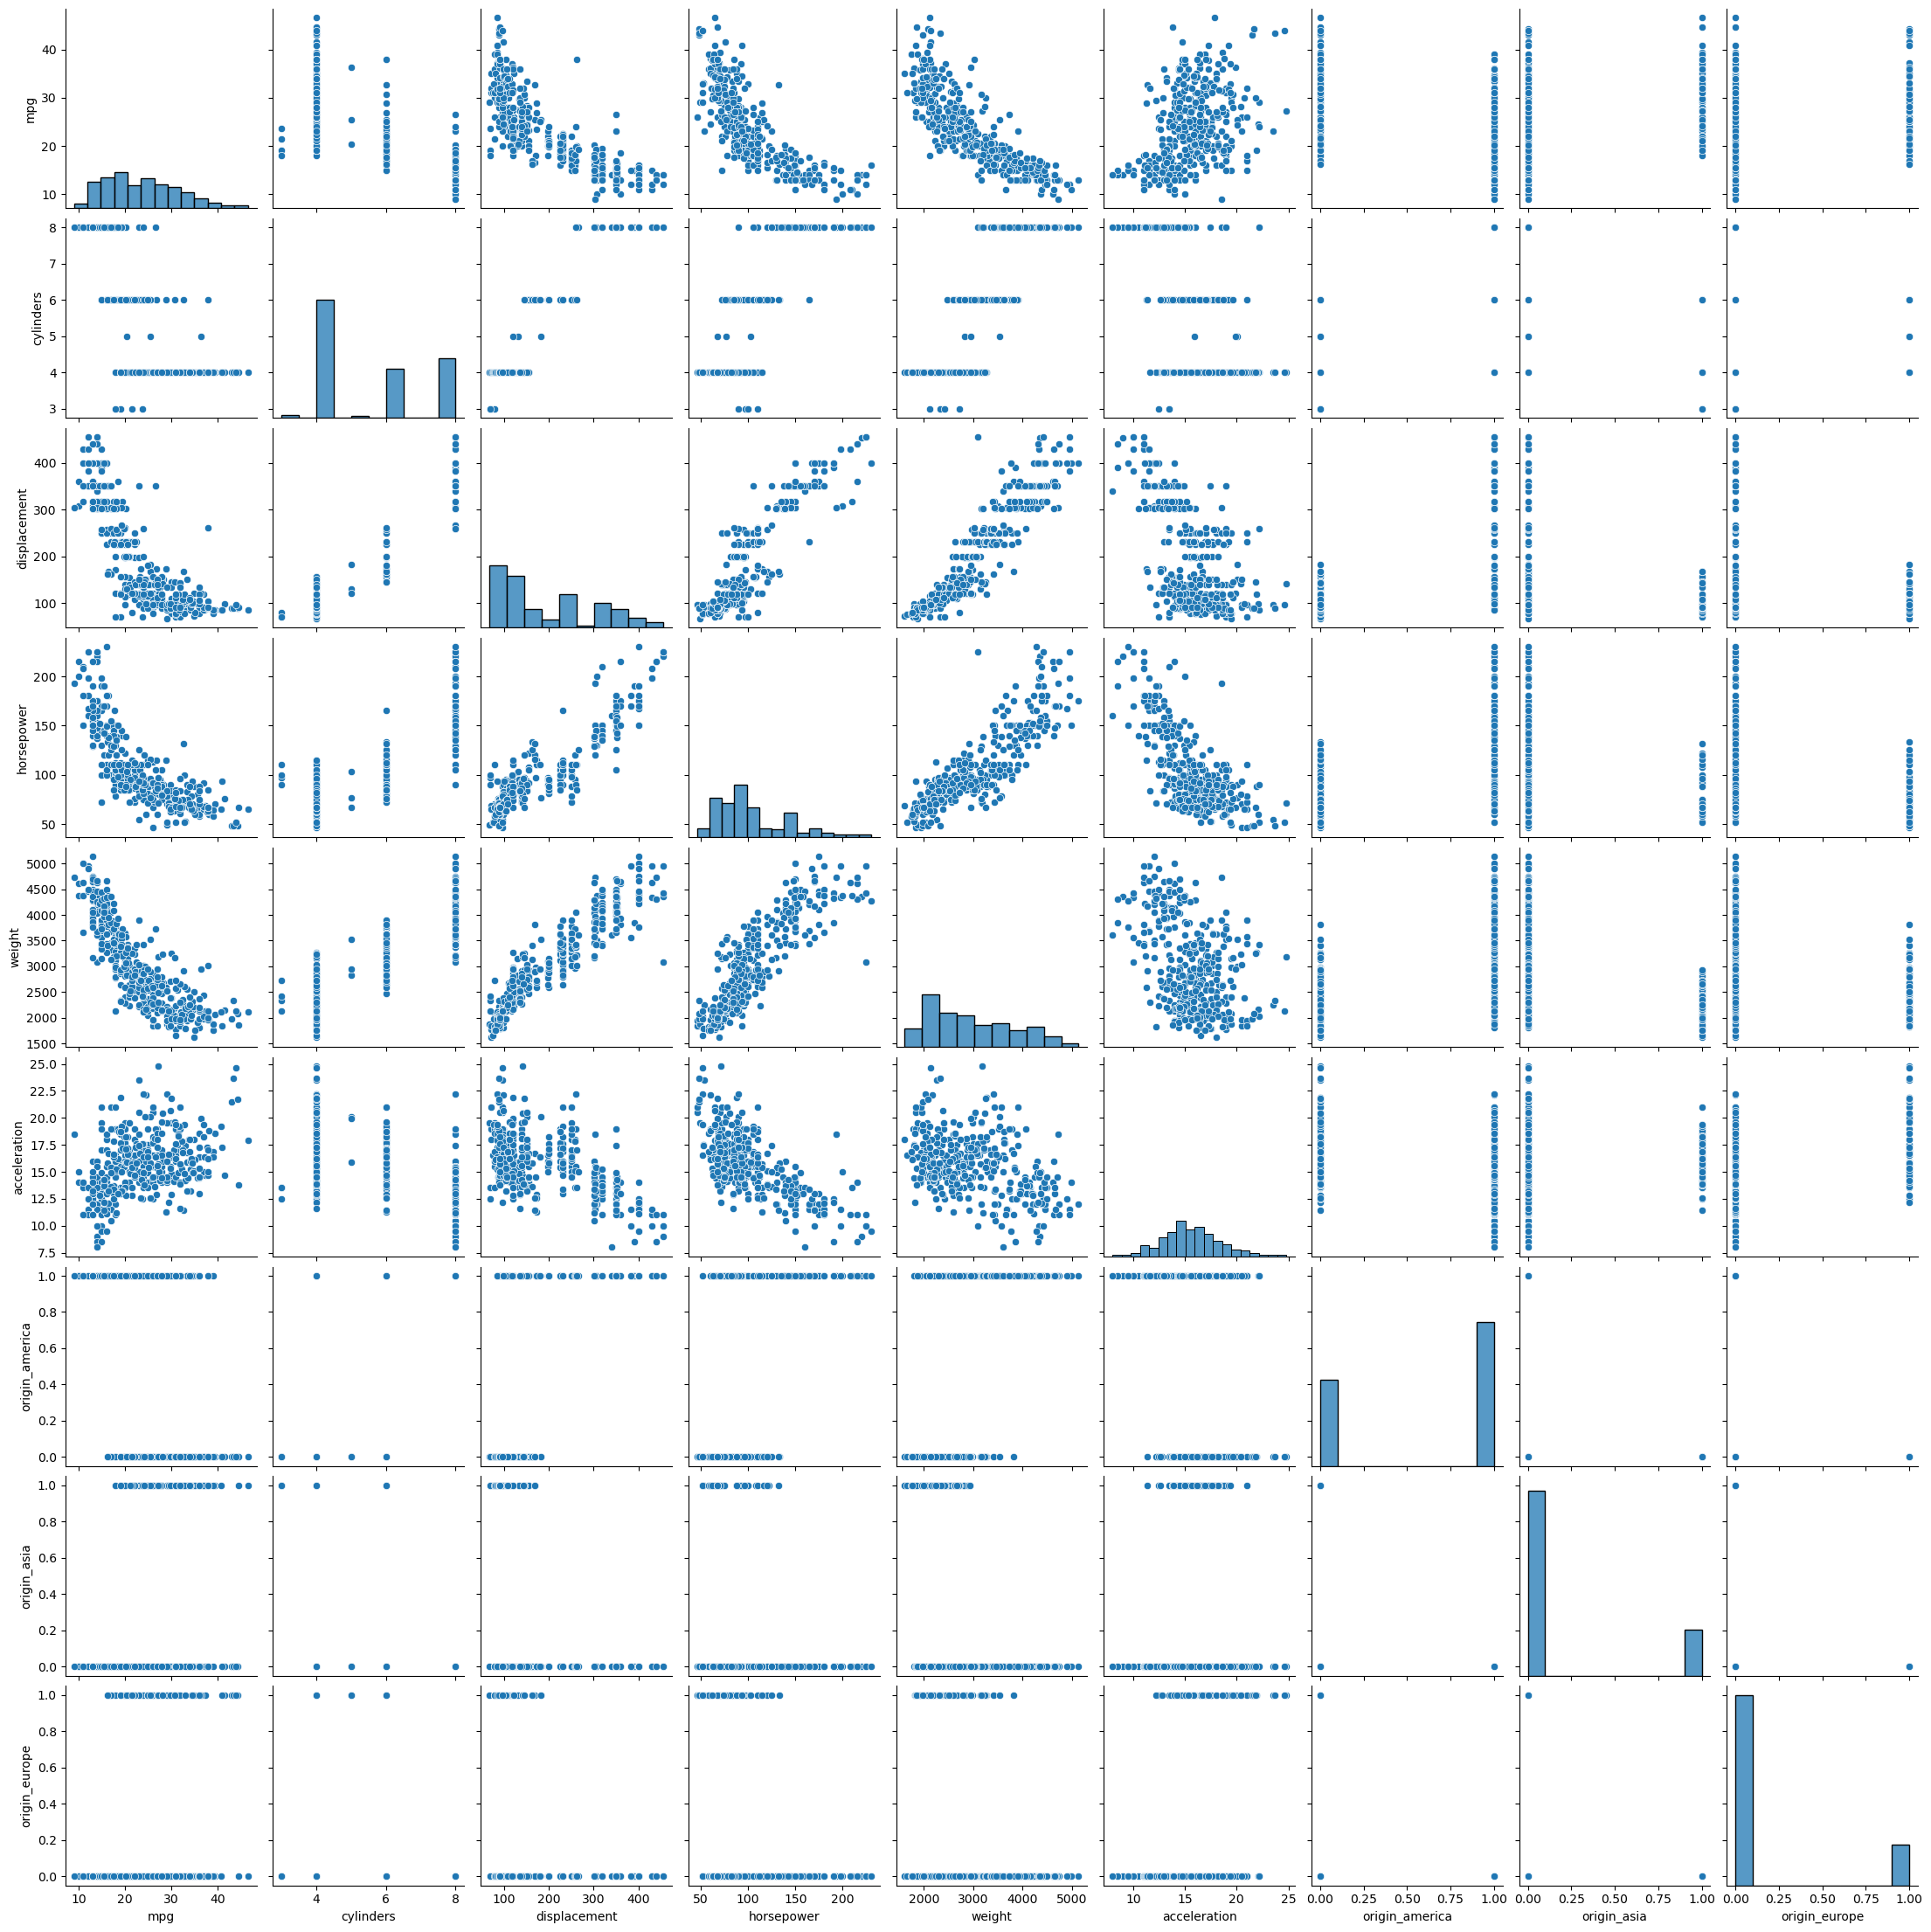

In [19]:
sns.pairplot(data)
plt.show()

In [20]:
x=data.drop('mpg',axis=1)
y=data['mpg']

In [21]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,1,0,0
1,8,350.0,165.0,3693,11.5,1,0,0
2,8,318.0,150.0,3436,11.0,1,0,0
3,8,304.0,150.0,3433,12.0,1,0,0
4,8,302.0,140.0,3449,10.5,1,0,0


In [22]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [24]:
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
for idx,col_name in enumerate(x_train.columns):
    print("The coeff for {0}={1}".format(col_name,model.coef_[idx]))

The coeff for cylinders=-0.5385175619522498
The coeff for displacement=0.009552745274875835
The coeff for horsepower=-0.057276990793058806
The coeff for weight=-0.005060766643316695
The coeff for acceleration=-0.04984260331460827
The coeff for origin_america=-1.0725834448504463
The coeff for origin_asia=1.1567451175283279
The coeff for origin_europe=-0.08416167267788122


In [27]:
print(model.coef_)

[-0.53851756  0.00955275 -0.05727699 -0.00506077 -0.0498426  -1.07258344
  1.15674512 -0.08416167]


In [28]:
print(model.intercept_)

46.76618365089037


In [29]:
model.score(x_train,y_train)

0.6946279278265037

In [30]:
model.score(x_test,y_test)

0.7725116212499806

In [31]:
data=pd.read_csv("auto-mpg.csv")

In [32]:
data=data.drop('car name',axis=1)

In [33]:
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [34]:
data=pd.get_dummies(data,columns=['origin'])

In [35]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [36]:
data=data.replace('?',np.nan)

In [37]:
m=lambda x:x.fillna(x.median())
data=data.apply(m,axis=0)

In [38]:
data['horsepower']=data['horsepower'].astype=('float64')

In [39]:
x=data.drop(['mpg','origin_europe'],axis=1)

In [40]:
y=data['mpg']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.03,random_state=1)

In [42]:
model=LinearRegression()

In [43]:
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'float64'

In [44]:
model.score(x_test,y_test)

ValueError: could not convert string to float: 'float64'

In [45]:
 from mlextend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlextend'